# Dimensionality Reduction with Drug Consumption Data

Author: George H. Chen (georgechen [at symbol] cmu.edu)

This demo uses the UCI drug consumption dataset:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

We begin with some boilerplate code.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

## Loading and preprocessing data

Next, we load in the UCI drug consumption data (which we assume resides in the same directory as this notebook). Each data point is represented as a 12-dimensional feature vector. Even though some of these features are not numerical (e.g., gender), they have been turned into numerical values (see the documentation on the UCI drug consumption data for what the numerical values mean for features that were originally not numerical).

In [4]:
import csv
import numpy as np
np.set_printoptions(suppress=True)  # somewhat prettier printing

drug_data = []
with open('./drug_consumption.data', 'r') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    for row in csv_reader:
        # row[0] is an ID, which we ignore
        # row[1], row[2], ..., row[12] correspond to the 12 feature vectors we care about
        drug_data.append([float(x) for x in row[1:13]])
drug_data = np.array(drug_data)  # convert the data to be a numpy array

We next standardize the data. Note that each row of `drug_data` corresponds to a different person, and each column corresponds to a different feature. Here, the standardization done subtracts off the mean of each column and divides by the standard deviation of the column (so that each column has mean 0 and unit variance):

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
drug_data_normalized = scaler.fit_transform(drug_data)

## Dimensionality reduction with PCA

Next we use PCA to bring the dimensionality of the data from 12 down to 2.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
drug_data_normalized_pca2d = pca.fit_transform(drug_data_normalized)

We can plot the 2D PCA representation (in the second line here, I ask for the two axes to use the same scaling, i.e., you'll notice that the grid lines form squares):

(-4.782217706634694, 5.244857433456446, -4.964051279891316, 5.0898951396601975)

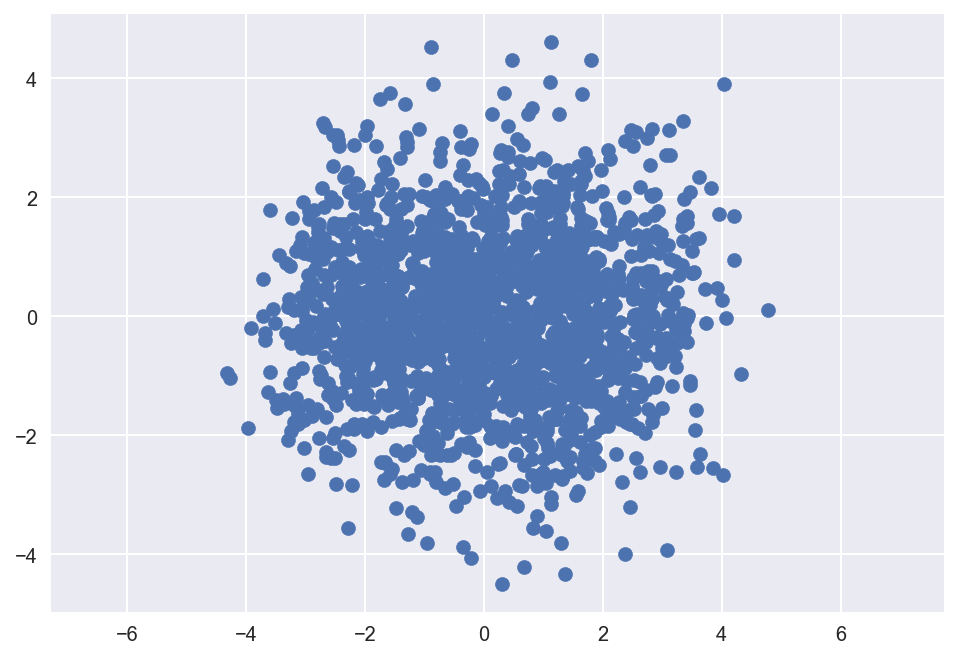

In [7]:
plt.scatter(drug_data_normalized_pca2d[:, 0], drug_data_normalized_pca2d[:, 1])
plt.axis('equal')

In [8]:
print(pca.components_[0])

[-0.30814595 -0.24522535 -0.21510942 -0.36956402  0.10774476  0.21829237
 -0.05229747  0.27205377 -0.24354739 -0.33911344  0.40360201  0.43456227]


In [9]:
np.inner(pca.components_[1], drug_data_normalized[0])

1.251660119287177

In [10]:
drug_data_normalized_pca2d[0]

array([-0.8930275 ,  1.25166012])

In [11]:
print(pca.components_[1])

[ 0.09329346  0.01478971 -0.17640044  0.03786158 -0.05526341  0.44066646
 -0.59335285 -0.38671826 -0.22543    -0.33520093 -0.13581118 -0.2793642 ]


In [12]:
pca.explained_variance_ratio_

array([0.24249161, 0.15598527])

## Dimensionality reduction with t-SNE

Next, I apply t-SNE. Note that the code is nearly identical to using PCA: we import the nonlinear dimensionality reduction method we want to use (`TSNE`), create an instance of it (which we name `tsne`), and for that particular instance, we do `fit_transform` on the data. **Warning:** t-SNE takes way longer to run than PCA.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)  # note: in practice you should actually play with the perplexity, learning rate, and number of iterations
drug_data_normalized_tsne2d = tsne.fit_transform(drug_data_normalized)

Plotting is done just like before, except now we use our newly defined variable `drug_data_normalized_tsne2d`:

(-57.403514002044574, 48.6667281133727, -59.19191840580933, 65.38216498784057)

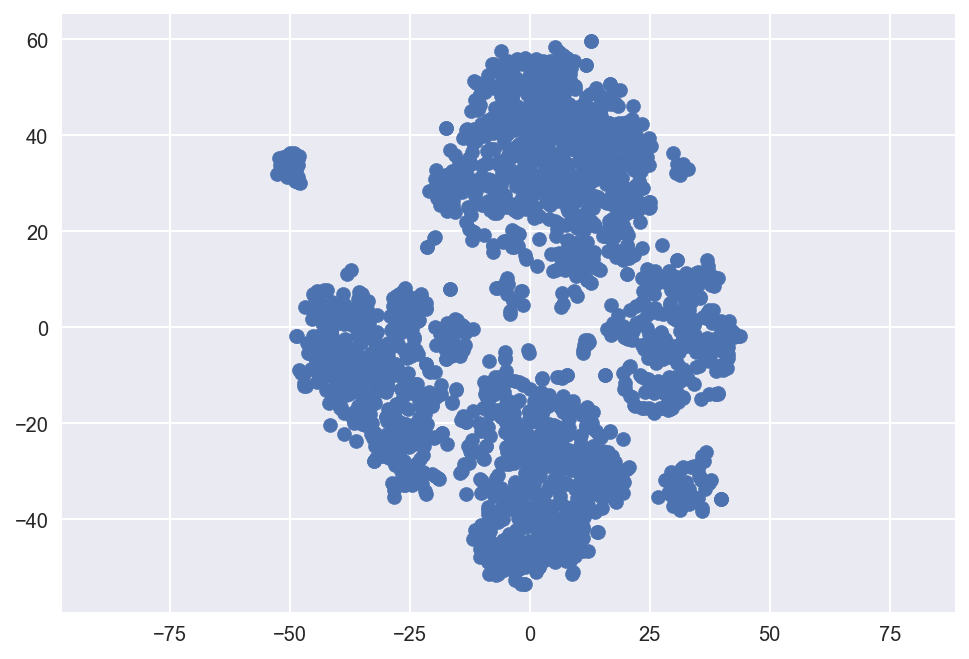

In [14]:
plt.scatter(drug_data_normalized_tsne2d[:, 0], drug_data_normalized_tsne2d[:, 1])
plt.axis('equal')

Unlike in PCA, in general for nonlinear dimensionality reduction methods, the axes aren't as easy to interpret. Each axis here is no longer just a simple weighted combination of the original features. In terms of interpretation, the main thing here is that points close to each other are more similar, and points far away from each other are more dissimilar.


However, with t-SNE, we are able to get some distinct blobs that appear. Could these blobs be semantically interesting? Possibly! (And possibly not!)